In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import numpy as np


df = pd.read_csv('./lotr_characters.csv')
df.head()

,birth,death,gender,hair,height,name,race,realm,spouse
0,NaN,NaN,Female,NaN,NaN,Adanel,Men,NaN,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),NaN,Boromir,Men,NaN,NaN
2,NaN,"March ,3019",Male,NaN,NaN,Lagduf,Orcs,NaN,NaN
3,TA 280,TA 515,Male,NaN,NaN,Tarcil,Men,Arnor,Unnamed wife
4,NaN,NaN,Male,NaN,NaN,Fire-drake of Gondolin,Dragon,NaN,NaN


In [2]:
# profile = ProfileReport(df, correlations = {'cramers': False})
# profile

In [3]:
df['race'].unique()

# Men, Hobbits + Hobbit, Elves + Elf, Dwarves + Dwarf, Ainur, Orcs + Orc, Dragons + Dragon, OTHER

array(['Men', 'Orcs', 'Dragon', 'Elves', nan, 'Hobbits', 'Dwarves',
       'Dragons', 'Great Spiders', 'Black Uruk', 'Maiar', 'Ainur',
       'Hobbit', 'Raven', 'Men,Wraith', 'Elf', 'God', 'Wolfhound',
       'Half-elven', 'Men,Rohirrim', 'Maiar,Balrog', 'Werewolves',
       'Dwarven', 'Goblin,Orc', 'Horse', 'Orc', 'Eagles', 'Uruk-hai',
       'Great Eagles', 'Men,Skin-changer', 'Maiar,Balrogs',
       'Uruk-hai,Orc', 'Orc,Goblin', 'Elves,Noldor', 'Drúedain',
       'Urulóki', 'Ents,Onodrim', 'Skin-changer', 'Ents', 'Elves,Maiar',
       'Balrog', 'Eagle', 'Dwarf', 'Stone-trolls', 'Vampire',
       'Men,Undead', 'Half-elven,Men', 'Ainur,Maiar'], dtype=object)

In [4]:
df['race'] = df['race'].fillna('Unknown')

In [5]:
df.head()

,birth,death,gender,hair,height,name,race,realm,spouse
0,NaN,NaN,Female,NaN,NaN,Adanel,Men,NaN,Belemir
1,TA 2978,"February 26 ,3019",Male,Dark (book) Light brown (movie),NaN,Boromir,Men,NaN,NaN
2,NaN,"March ,3019",Male,NaN,NaN,Lagduf,Orcs,NaN,NaN
3,TA 280,TA 515,Male,NaN,NaN,Tarcil,Men,Arnor,Unnamed wife
4,NaN,NaN,Male,NaN,NaN,Fire-drake of Gondolin,Dragon,NaN,NaN


In [6]:
sample = 'Men,Skin-changer'
fixed = sample.split(',')[0]

fixed

'Men'

In [7]:
for item in df['race']:
    new_item = item.split(',')[0]
    df['race'].replace(item, new_item, inplace=True)

In [8]:
df['race'].unique()

array(['Men', 'Orcs', 'Dragon', 'Elves', 'Unknown', 'Hobbits', 'Dwarves',
       'Dragons', 'Great Spiders', 'Black Uruk', 'Maiar', 'Ainur',
       'Hobbit', 'Raven', 'Elf', 'God', 'Wolfhound', 'Half-elven',
       'Werewolves', 'Dwarven', 'Goblin', 'Horse', 'Orc', 'Eagles',
       'Uruk-hai', 'Great Eagles', 'Drúedain', 'Urulóki', 'Ents',
       'Skin-changer', 'Balrog', 'Eagle', 'Dwarf', 'Stone-trolls',
       'Vampire'], dtype=object)

In [9]:
df['race'].replace('Dwarven', 'Dwarves', inplace = True)

In [10]:
# Men, Hobbits + Hobbit, Elves + Elf, Dwarves + Dwarf, Ainur, Orcs + Orc, Dragons + Dragon, OTHER

df['race'].replace(['Hobbit', 'Elf', 'Dwarf', 'Orc', 'Dragon'], ['Hobbits', 'Elves', 'Dwarves', 'Orcs', 'Dragons'], inplace = True)
df['race'].value_counts()

Men              394
Hobbits          142
Unknown          140
Elves            108
Dwarves           44
Ainur             25
Orcs              11
Half-elven         8
Dragons            6
Maiar              6
Uruk-hai           4
Ents               3
Great Spiders      2
Great Eagles       2
Werewolves         2
Eagles             1
Drúedain           1
Skin-changer       1
Black Uruk         1
Stone-trolls       1
Horse              1
Vampire            1
God                1
Balrog             1
Raven              1
Eagle              1
Wolfhound          1
Urulóki            1
Goblin             1
Name: race, dtype: int64

In [11]:
sample = df['race'].value_counts()
df['race'] = np.where(df['race'].isin(sample.index[sample >= 5]), df['race'], 'Other')

In [12]:
percentages = df['race'].value_counts(normalize = True)
print(f'Our baseline score is {percentages[0]}.')

Our baseline score is 0.43249176728869376.


In [13]:
df.to_csv('lotr_clean.csv')

In [14]:
train, test = train_test_split(df, train_size = 0.70, test_size = 0.30, stratify = df['race'], random_state = 42)
val, test = train_test_split(test, train_size = 0.50, test_size = 0.50, stratify = test['race'], random_state = 42)

target = 'race'
train_features = train.drop(columns = target)

In [15]:
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 1000].index.tolist()

features = numeric_features + categorical_features

In [16]:
train.shape, val.shape, test.shape

((637, 9), (137, 9), (137, 9))

In [17]:
features

['birth', 'death', 'gender', 'hair', 'height', 'name', 'realm', 'spouse']

In [18]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [19]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\anika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy 0.656934306569343


In [20]:
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

X_train shape after encoding (637, 1593)


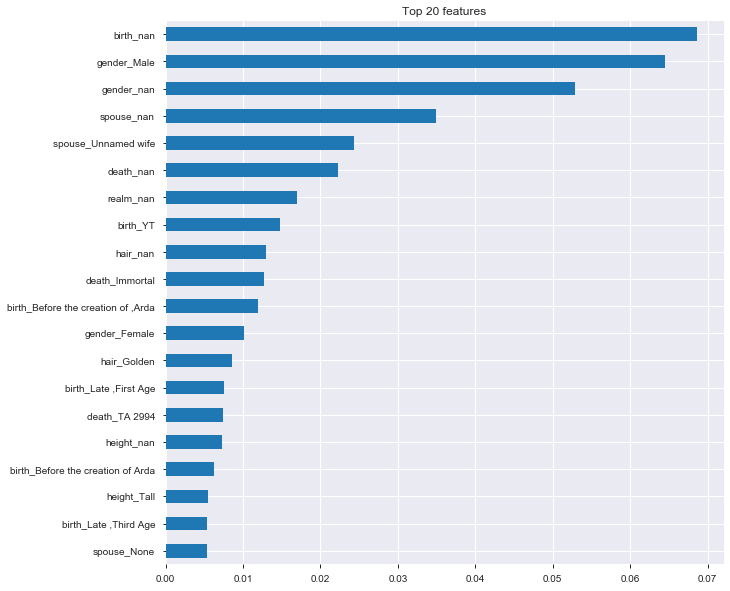

In [21]:
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

## Try some new features

In [22]:
names = pd.read_csv('./lotr_with_name_info.csv')
names = names.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [23]:
train, test = train_test_split(names, train_size = 0.70, test_size = 0.30, stratify = names['race'], random_state = 42)
val, test = train_test_split(test, train_size = 0.50, test_size = 0.50, stratify = test['race'], random_state = 42)

target = 'race'
train_features = train.drop(columns = target)

In [24]:
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 1000].index.tolist()

features = numeric_features + categorical_features

In [25]:
features

['name_length',
 'vowel_count',
 'pct_vowels',
 'birth',
 'death',
 'gender',
 'hair',
 'height',
 'name',
 'realm',
 'spouse',
 'first_letter',
 'starts_vowel']

In [26]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [27]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\anika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy 0.7591240875912408


In [28]:
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

X_train shape after encoding (637, 1626)


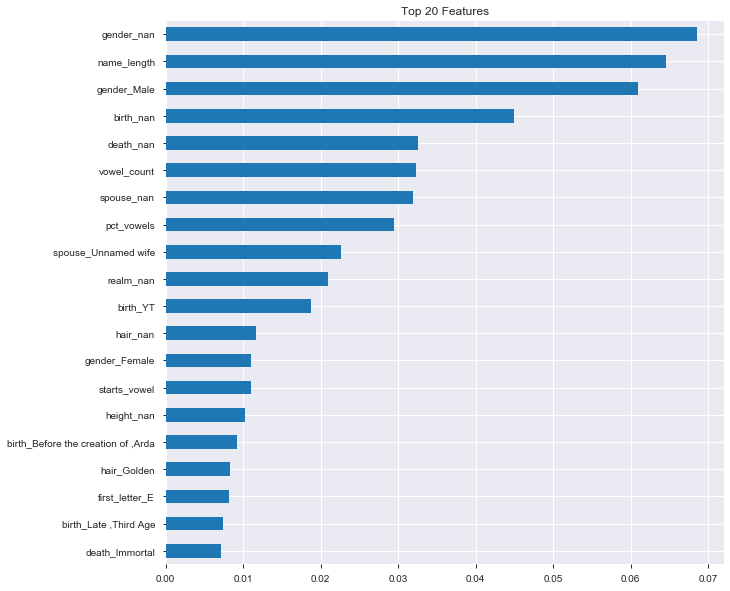

In [30]:
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh();